In [1]:
#Zona de importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modelos
from sklearn.naive_bayes import GaussianNB
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier

#Visualizar el árbol
import pydotplus
from sklearn.tree import export_text
from IPython.display import Image
import graphviz

#Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split 

#Naïve Bayes Classifier - Questions


In [8]:
questions = pd.read_excel('Questions1.xlsx')
questions.head()

,this,is,my,book,they,are,novels,have,you,read,who,the,author,what,characters,how,I,bought,like,fictions,your,favorite,Q
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1


In [11]:
questions2 = pd.read_excel('Questions2.xlsx')
questions.head()

,this,is,my,book,they,are,novels,have,you,read,who,the,author,what,characters,how,I,bought,like,fictions,your,favorite,Q
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1


### Entrenamiento del modelo

In [17]:
#Creo el modelo
nb = GaussianNB()
nb2 = GaussianNB()

#Divido los datos en Features y Outputs (Lista1)
words = questions.drop(columns=['Q'],axis=1)
q = questions['Q']

#Divido los datos en Features y Outputs (Lista2)
words2 = questions2.drop(columns=['Q'],axis=1)
q2 = questions2['Q']

#Particiono los datos (Lista1)
words_train, words_test, q_train, q_test = train_test_split(words, q , test_size=0.2, random_state=4)

#Particiono los datos (Lista2)
words2_train, words2_test, q2_train, q2_test = train_test_split(words2, q2 , test_size=0.2, random_state=4)

#Entrenando al modelo
nb.fit(words_train,q_train)#Lista1
nb2.fit(words2_train,q2_train)#Lista2

#Testeo del modelo
q_pred = nb.predict(words_test)#Lista1
q2_pred = nb2.predict(words2_test)#Lista2

#Verificando la exactitud del modelo
print("Accuracy primera lista:",accuracy_score(q_test,q_pred))
print("Accuracy segunda lista:",accuracy_score(q2_test,q2_pred))

#Precisión del modelo
print("Precision primera lista:",precision_score(q_test,q_pred , average='micro'))
print("Precision segunda lista:",precision_score(q2_test,q2_pred , average='micro'))


Accuracy primera lista: 0.6666666666666666
Accuracy segunda lista: 1.0
Precision primera lista: 0.6666666666666666
Precision segunda lista: 1.0


### Predicciones

In [23]:
#Para la lista 1
pred1 = nb.predict([[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0]])#I bought books
pred1

array([0])

# Classifiers

##Classifier - Fruit

## Preparación de los datos

In [ ]:
#Carga de los datos
df = pd.read_excel("FruitsData.xlsx")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
#Eliminamos la columna fruit_subtype, pues si estuviese le quitaría gracia al ejercicio
df = df.drop("fruit_subtype",axis=1)
df.tail()

,fruit_label,fruit_name,mass,width,height,color_score
54,4,lemon,116,6.1,8.5,0.71
55,4,lemon,116,6.3,7.7,0.72
56,4,lemon,116,5.9,8.1,0.73
57,4,lemon,152,6.5,8.5,0.72
58,4,lemon,118,6.1,8.1,0.70


## Análisis Exploratorio

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


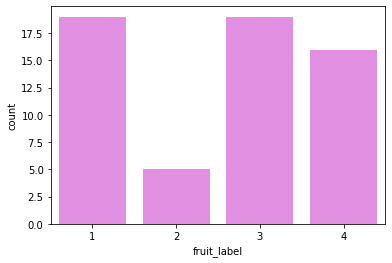

In [ ]:
#Análisis de las frutas en general
sns.countplot(df['fruit_label'], color='violet')

<p>Podemos observar que las frutas de 1 y 3 tienen una mayor frecuencia y que la de menor frecuencia es la fruta 2<p>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

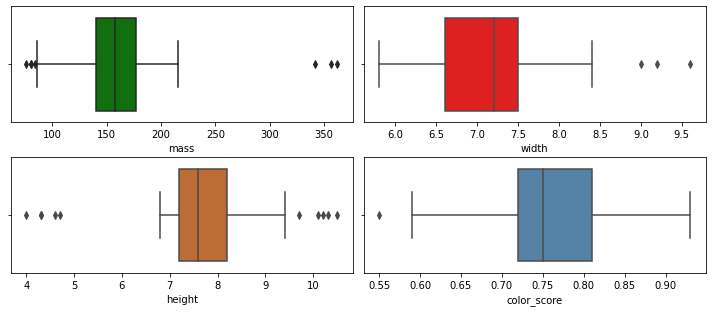

In [ ]:
f = plt.figure(figsize=(10,4))


#Boxplot para la masa de la fruta
f.add_subplot(2,2,1)
sns.boxplot(df['mass'],color='green')
plt.tight_layout(h_pad=0.4)

#Boxplot para el ancho de la fruta
f.add_subplot(2,2,2)
sns.boxplot(df['width'],color='red')

#Boxplot para el alto de la fruta
f.add_subplot(2,2,3)
sns.boxplot(df['height'],color='chocolate')

#Boxplot para el color score
f.add_subplot(2,2,4)
sns.boxplot(df['color_score'],color='steelblue')



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

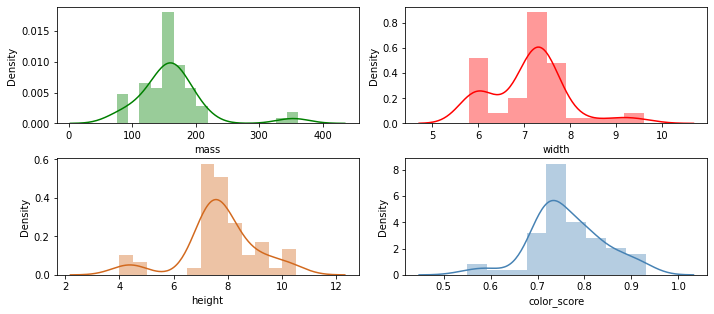

In [ ]:
f2 = plt.figure(figsize=(10,4))

#Histograma y diagrama de distribución para la masa de la fruta
f2.add_subplot(2,2,1)
sns.distplot(df['mass'],color='green')
plt.tight_layout(pad=1,h_pad=0.4)

#Histograma y diagrama de distribución para el ancho de la fruta
f2.add_subplot(2,2,2)
sns.distplot(df['width'],color='red')
plt.tight_layout(pad=1,h_pad=0.4)

#Histograma y diagrama de distribución para el alto de la fruta
f2.add_subplot(2,2,3)
sns.distplot(df['height'],color='chocolate')

#Histograma y diagrama de distribución para el color score de la fruta
f2.add_subplot(2,2,4)
sns.distplot(df['color_score'],color='steelblue')


In [ ]:
df.corr().style.background_gradient()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


## Naïve Bayes

### Entrenamiento del modelo

In [ ]:
#Creo el modelo
nb = GaussianNB()

#Divido los datos en Features y Outputs
X = df.drop(columns=['fruit_label','fruit_name'])
Y = df['fruit_label'] 

#Particiono los datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=4)

#Entrenando al modelo
nb.fit(X_train,Y_train)

#Testeo del modelo
Y_pred = nb.predict(X_test)

#Verificando la exactitud del modelo
print("Accuracy:",accuracy_score(Y_test,Y_pred))
#Precisión del modelo
print("Precision:",precision_score(Y_test,Y_pred , average='micro'))

Accuracy: 0.8333333333333334
Precision: 0.8333333333333334


### Predicciones

In [ ]:
Y_pred

array([2, 1, 4, 3, 1, 4, 3, 1, 2, 4, 2, 3])

In [ ]:
predicted = nb.predict([[150,7.4,7,0.77]])
predicted

array([1])

## Decision Trees

In [ ]:
#Creo el modelo
dtc = tree.DecisionTreeClassifier(criterion='entropy')

#Divido los datos en Features y Outputs
X1 = df.drop(columns=['fruit_label','fruit_name'])
Y1 = df['fruit_label'] 

#Particiono los datos
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1 , test_size=0.2, random_state=4)

#Entrenando al modelo
dtc_train = dtc.fit(X1_train, Y1_train)

#Testeo del modelo
Y1_pred = dtc.predict(X1_test)

#Verificando la exactitud del modelo
print("Accuracy:",accuracy_score(Y1_test,Y1_pred))
#Precisión del modelo
print("Precision:",precision_score(Y1_test,Y1_pred , average='micro'))

Accuracy: 0.8333333333333334
Precision: 0.8333333333333334


### Predicciones


In [ ]:
Y1_pred

array([2, 1, 4, 3, 1, 4, 3, 3, 2, 1, 2, 3])

### Visualización del árbol

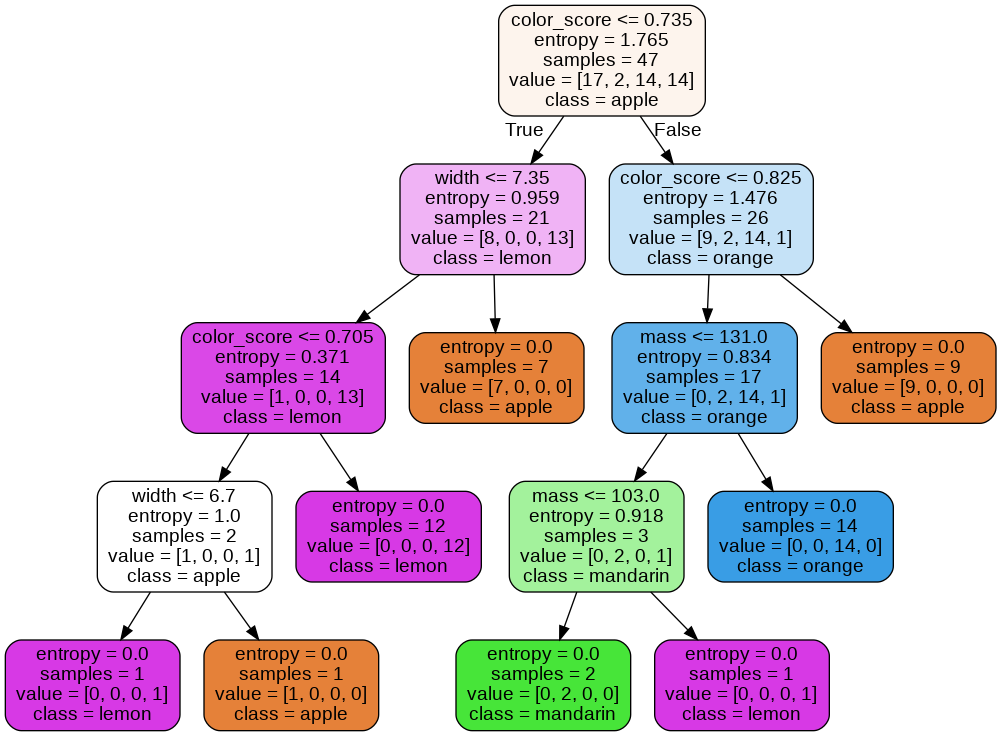

In [ ]:
dot_data = tree.export_graphviz(dtc_train, out_file=None, feature_names=list(X1.columns.values), class_names=['apple','mandarin','orange','lemon'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## KNN

### Entrenamiento del modelo

In [ ]:
#Creo el modelo
knn = KNeighborsClassifier(n_neighbors=3)

#Divido los datos en Features y Outputs
X2 = df.drop(columns=['fruit_label','fruit_name'])
Y2 = df['fruit_label'] 

#Particiono los datos
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=4)

#Entrenando al modelo
knn_train = knn.fit(X2_train, Y2_train)

#Testeo del modelo
Y2_pred = knn.predict(X2_test)

#Verificando la exactitud del modelo
print("Accuracy:",accuracy_score(Y2_test,Y2_pred))
#Precisión del modelo
print("Precision:",precision_score(Y2_test,Y2_pred , average='micro'))

Accuracy: 0.5833333333333334
Precision: 0.5833333333333334


### Predicciones

In [ ]:
Y2_pred

array([2, 3, 4, 3, 3, 3, 1, 1, 2, 1, 2, 3])

##Classifier - Cancer

### Preparación de los datos

In [ ]:
dc = pd.read_excel('Breast_cancer.xlsx')
dc.head(25)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Análisis Exploratorio

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


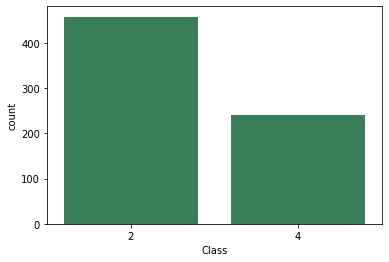

In [ ]:
#Frecuencia de personas estudiadas
sns.countplot(dc['Class'], color='seagreen')

<p>Para este caso 2 significa "benigno" y 4 significa "maligno". Podemos observar que las personas con cáncer son menos</p>



In [ ]:
col = []
for i in dc['Bare Nuclei']:
  if i == '?':
    col.append(0)
  else:
    col.append(i)
dc = dc.drop('Bare Nuclei',axis=1)
dc['Bare Nuclei'] = col
dc.head(25)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Bare Nuclei
0,1000025,5,1,1,1,2,3,1,1,2,1
1,1002945,5,4,4,5,7,3,2,1,2,10
2,1015425,3,1,1,1,2,3,1,1,2,2
3,1016277,6,8,8,1,3,3,7,1,2,4
4,1017023,4,1,1,3,2,3,1,1,2,1
5,1017122,8,10,10,8,7,9,7,1,4,10
6,1018099,1,1,1,1,2,3,1,1,2,10
7,1018561,2,1,2,1,2,3,1,1,2,1
8,1033078,2,1,1,1,2,1,1,5,2,1
9,1033078,4,2,1,1,2,2,1,1,2,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

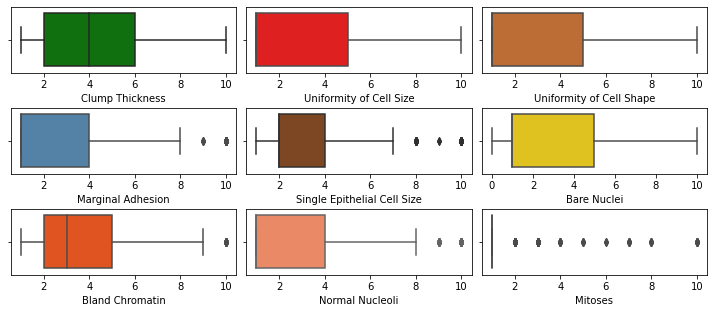

In [ ]:
f = plt.figure(figsize=(10,4))


#Boxplot para la masa de la fruta
f.add_subplot(3,3,1)
sns.boxplot(dc['Clump Thickness'],color='green')
plt.tight_layout(pad=1,h_pad=0.4)

#Boxplot para el ancho de la fruta
f.add_subplot(3,3,2)
sns.boxplot(dc['Uniformity of Cell Size'],color='red')

#Boxplot para el alto de la fruta
f.add_subplot(3,3,3)
sns.boxplot(dc['Uniformity of Cell Shape'],color='chocolate')

#Boxplot para el color score
f.add_subplot(3,3,4)
sns.boxplot(dc['Marginal Adhesion'],color='steelblue')

#Boxplot para el color score
f.add_subplot(3,3,5)
sns.boxplot(dc['Single Epithelial Cell Size'],color='saddlebrown')

#Boxplot para el color score
f.add_subplot(3,3,6)
sns.boxplot(dc['Bare Nuclei'],color='gold')

#Boxplot para el color score
f.add_subplot(3,3,7)
sns.boxplot(dc['Bland Chromatin'],color='orangered')

#Boxplot para el color score
f.add_subplot(3,3,8)
sns.boxplot(dc['Normal Nucleoli'],color='coral')

#Boxplot para el color score
f.add_subplot(3,3,9)
sns.boxplot(dc['Mitoses'],color='steelblue')




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

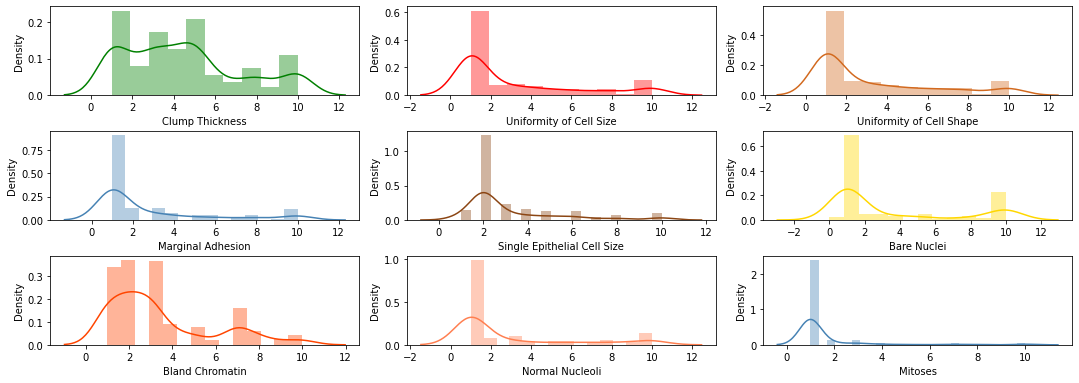

In [ ]:
 f = plt.figure(figsize=(15,5))


#Boxplot para la masa de la fruta
f.add_subplot(3,3,1)
sns.distplot(dc['Clump Thickness'],color='green')
plt.tight_layout(h_pad=0.5)

#Boxplot para el ancho de la fruta
f.add_subplot(3,3,2)
sns.distplot(dc['Uniformity of Cell Size'],color='red')
plt.tight_layout(h_pad=0.5)

#Boxplot para el alto de la fruta
f.add_subplot(3,3,3)
sns.distplot(dc['Uniformity of Cell Shape'],color='chocolate')

#Boxplot para el color score
f.add_subplot(3,3,4)
sns.distplot(dc['Marginal Adhesion'],color='steelblue')

#Boxplot para el color score
f.add_subplot(3,3,5)
sns.distplot(dc['Single Epithelial Cell Size'],color='saddlebrown')

#Boxplot para el color score
f.add_subplot(3,3,6)
sns.distplot(dc['Bare Nuclei'],color='gold')

#Boxplot para el color score
f.add_subplot(3,3,7)
sns.distplot(dc['Bland Chromatin'],color='orangered')

#Boxplot para el color score
f.add_subplot(3,3,8)
sns.distplot(dc['Normal Nucleoli'],color='coral')

#Boxplot para el color score
f.add_subplot(3,3,9)
sns.distplot(dc['Mitoses'],color='steelblue')

In [ ]:
dc.corr().style.background_gradient()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Bare Nuclei
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226,-0.089871
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001,0.589296
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904,0.684569
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934,0.704529
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800,0.665723
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785,0.582904
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616,0.671545
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244,0.572054
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170,0.342795
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000,0.817653


### Naïve Bayes

## Naïve Bayes

### Entrenamiento del modelo

In [ ]:
#Creo el modelo
nb = GaussianNB()

#Divido los datos en Features y Outputs
Xc = dc.drop(columns=['Class'])
Yc = dc['Class'] 

#Particiono los datos
Xc_train, Xc_test, Yc_train, Yc_test = train_test_split(Xc, Yc , test_size=0.2, random_state=4)

#Entrenando al modelo
nb.fit(Xc_train,Yc_train)

#Testeo del modelo
Yc_pred = nb.predict(Xc_test)

#Verificando la exactitud del modelo
print("Accuracy:",accuracy_score(Yc_test,Yc_pred))
#Precisión del modelo
print("Precision:",precision_score(Yc_test,Yc_pred , average='micro'))

Accuracy: 0.8642857142857143
Precision: 0.8642857142857143


### Predicciones

In [ ]:
Yc_pred

array([4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2,
       4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 4])

array([1])

### Decision Trees

## Decision Trees

In [ ]:
#Creo el modelo
dtc = tree.DecisionTreeClassifier(criterion='entropy')

#Divido los datos en Features y Outputs
Xc1 = dc.drop(columns=['Class'])
Yc1 = dc['Class'] 

#Particiono los datos
Xc1_train, Xc1_test, Yc1_train, Yc1_test = train_test_split(Xc1, Yc1 , test_size=0.2, random_state=4)

#Entrenando al modelo
dtc_train = dtc.fit(Xc1_train, Yc1_train)

#Testeo del modelo
Yc1_pred = dtc.predict(Xc1_test)

#Verificando la exactitud del modelo
print("Accuracy:",accuracy_score(Yc1_test,Yc1_pred))
#Precisión del modelo
print("Precision:",precision_score(Yc1_test,Yc1_pred , average='micro'))

Accuracy: 0.95
Precision: 0.95


### Predicciones


In [ ]:
Yc1_pred

array([4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       2, 4, 2, 4, 2, 2, 4, 4])

### Visualización del árbol

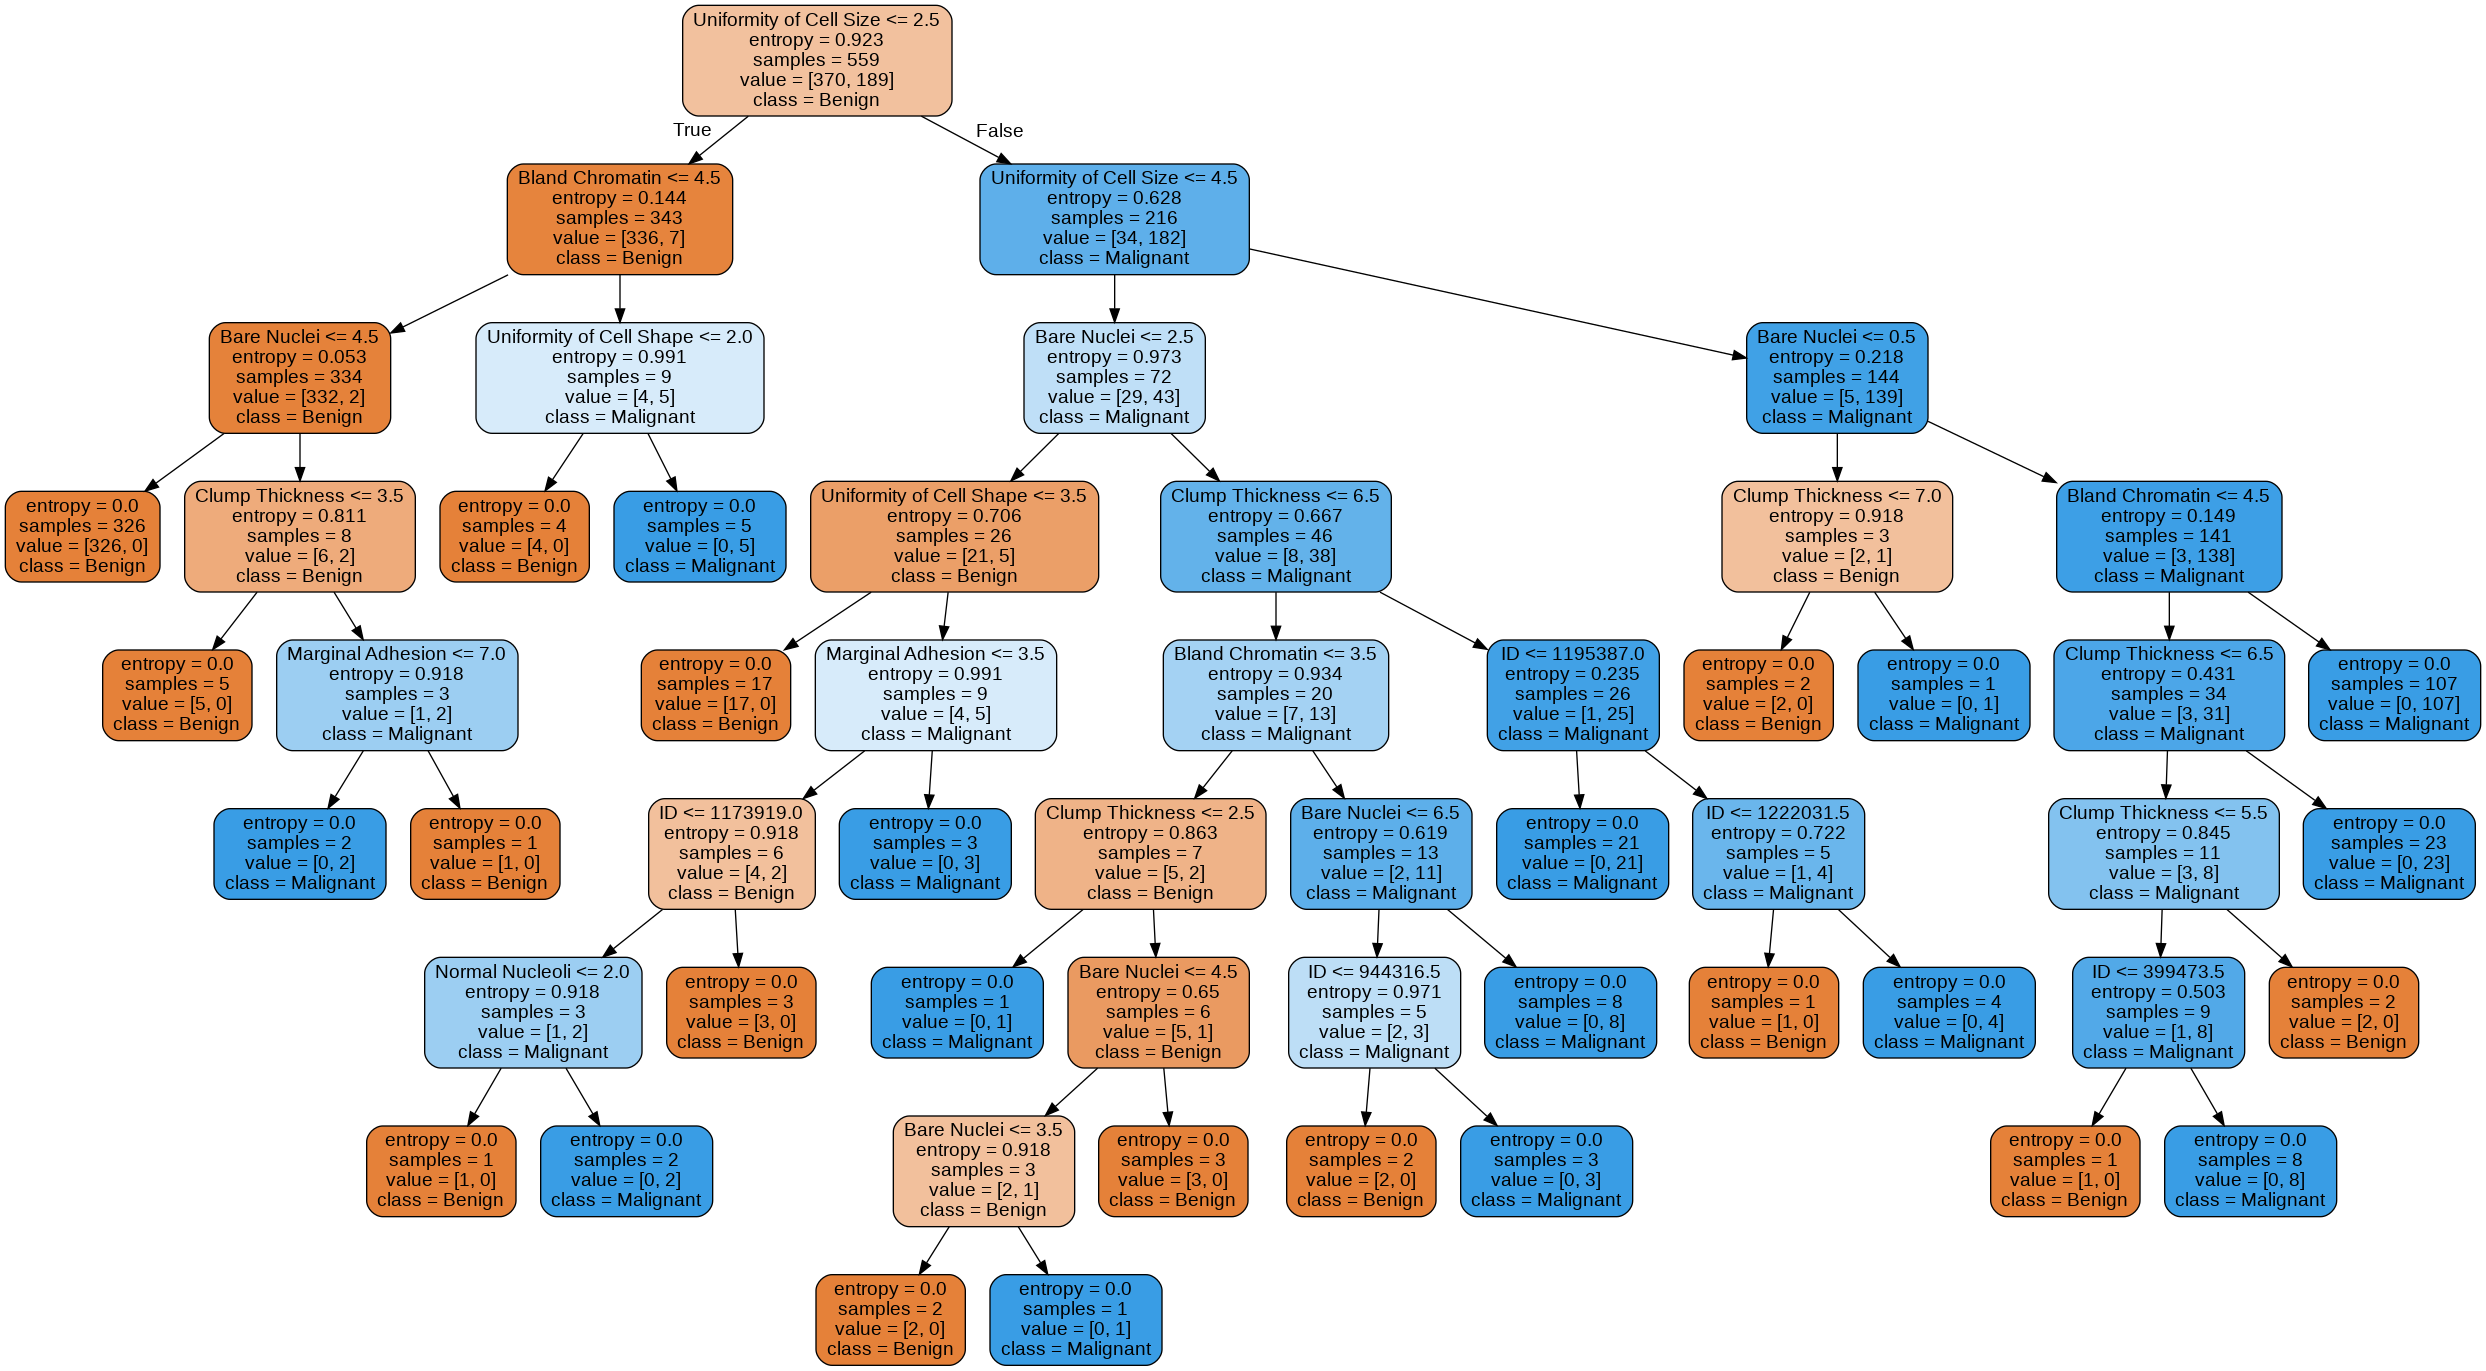

In [ ]:
dot_data = tree.export_graphviz(dtc_train, out_file=None, feature_names=list(Xc1.columns.values), class_names=['Benign','Malignant'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

###KNN

## KNN

### Entrenamiento del modelo

In [ ]:
#Creo el modelo
knn = KNeighborsClassifier(n_neighbors=2)

#Divido los datos en Features y Outputs
Xc2 = dc.drop(columns=['Class'])
Yc2 = dc['Class'] 

#Particiono los datos
Xc2_train, Xc2_test, Yc2_train, Yc2_test = train_test_split(Xc2, Yc2, test_size=0.2, random_state=4)

#Entrenando al modelo
knn_train = knn.fit(Xc2_train, Yc2_train)

#Testeo del modelo
Yc2_pred = knn.predict(Xc2_test)

#Verificando la exactitud del modelo
print("Accuracy:",accuracy_score(Yc2_test,Yc2_pred))
#Precisión del modelo
print("Precision:",precision_score(Yc2_test,Yc2_pred , average='micro'))

Accuracy: 0.6357142857142857
Precision: 0.6357142857142857


### Predicciones

In [ ]:
Y2_pred

array([2, 3, 4, 3, 3, 3, 1, 1, 2, 1, 2, 3])